In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests, coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Load the data
data = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\IITK 3rd\ECO764_2024\Week1_case_study\data.csv")

# Display the first few rows to understand the structure
print(data.head())

         Date  Futures price (₹/kilogram)  Spot price (₹/ kilogram)
0  01-01-2014                       845.7                     947.4
1  02-01-2014                       846.6                     951.6
2  03-01-2014                       840.5                     950.7
3  04-01-2014                       829.3                     945.2
4  05-01-2014                       829.3                     945.2


In [2]:
data = data.rename(columns={
    'Futures price (₹/kilogram)': 'Futures_Price',
    'Spot price (₹/kilogram)': 'Spot_Price',
    'Date': 'Date'
})


# Try to parse dates with mixed formats
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)


In [3]:
print(data.columns)

Index(['Date', 'Futures_Price', 'Spot price (₹/ kilogram)'], dtype='object')


In [4]:
data = data.rename({'Spot price (₹/kilogram)': 'Spot_Price'})

In [5]:
data = data.rename(columns={
    'Spot price (₹/ kilogram)': 'Spot_Price',
    'Futures price (₹/ kilogram)': 'Futures_Price'
})

In [6]:
data.columns

Index(['Date', 'Futures_Price', 'Spot_Price'], dtype='object')

In [7]:
# Descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)

# Correlation between spot and futures prices
correlation = data['Spot_Price'].corr(data['Futures_Price'])
print(f"Correlation: {correlation}")

# Volatility (standard deviation of returns)
data['Spot_Returns'] = data['Spot_Price'].pct_change()
data['Futures_Returns'] = data['Futures_Price'].pct_change()
volatility_spot = data['Spot_Returns'].std()
volatility_futures = data['Futures_Returns'].std()
print(f"Volatility (Spot): {volatility_spot}")
print(f"Volatility (Futures): {volatility_futures}")

                                Date  Futures_Price   Spot_Price
count                           1093    1093.000000  1093.000000
mean   2015-07-01 15:59:07.301006336     850.697347   963.939524
min              2014-01-01 00:00:00     655.900000   741.700000
25%              2014-10-01 00:00:00     783.700000   884.600000
50%              2015-07-02 00:00:00     867.800000  1001.200000
75%              2016-03-31 00:00:00     912.300000  1042.400000
max              2016-12-29 00:00:00    1111.000000  1198.100000
std                              NaN      96.375451   107.253308
Correlation: 0.975320031219019
Volatility (Spot): 0.008622620195137784
Volatility (Futures): 0.012928973353320512


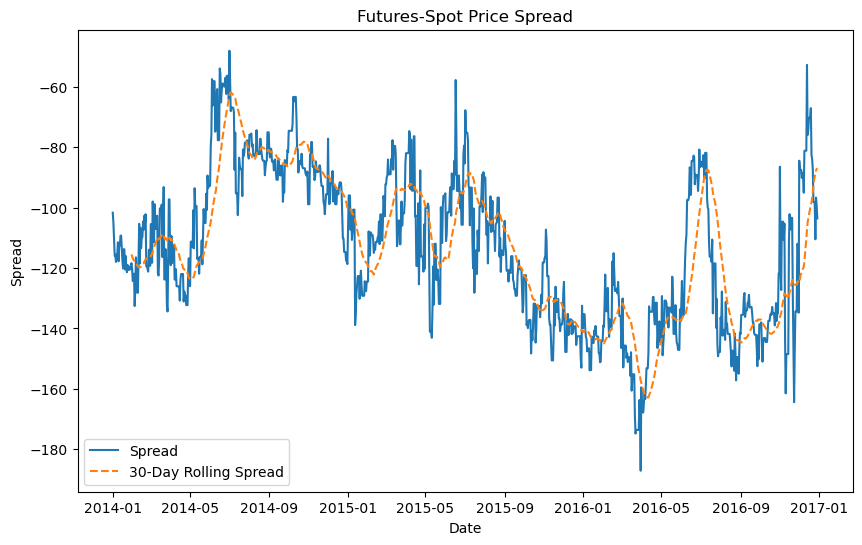

In [11]:
# Calculate the spread between futures and spot prices
data['Spread'] = data['Futures_Price'] - data['Spot_Price']

# Rolling window analysis of the spread
data['Spread_Rolling'] = data['Spread'].rolling(window=30).mean()

# Plot the spread
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Spread'], label='Spread')
plt.plot(data['Date'], data['Spread_Rolling'], label='30-Day Rolling Spread', linestyle='--')
plt.legend()
plt.title('Futures-Spot Price Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.savefig('Futures-Spot_Price_Spread')
plt.show()


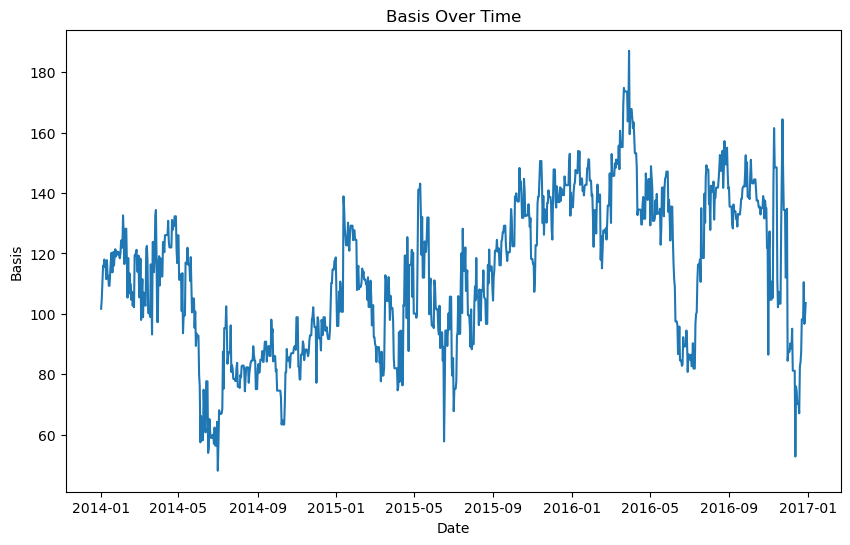

In [12]:
# Calculate the basis
data['Basis'] = data['Spot_Price'] - data['Futures_Price']

# Basis trend over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Basis'])
plt.title('Basis Over Time')
plt.xlabel('Date')
plt.ylabel('Basis')
plt.show()


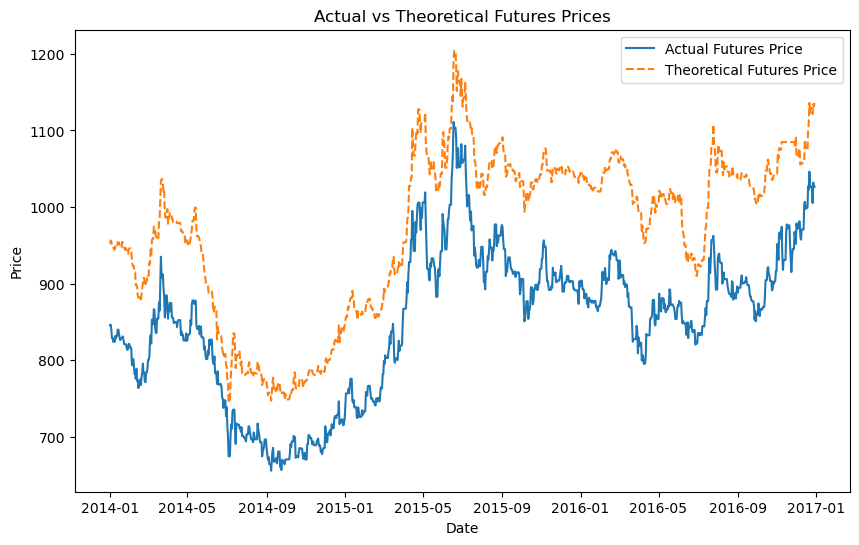

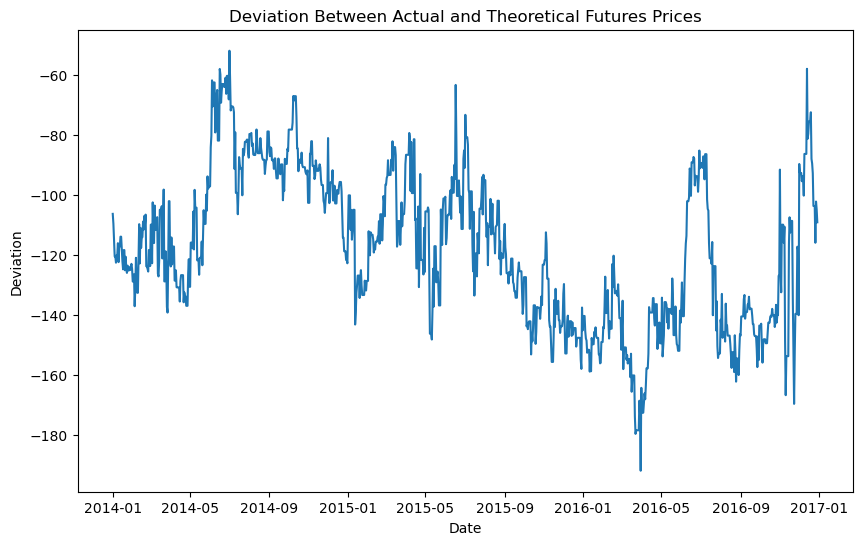

In [19]:
import numpy as np

# Parameters for Cost of Carry model
risk_free_rate = 0.05  # Example risk-free rate
storage_cost = 0.02    # Example storage cost per year
convenience_yield = 0.01 # Example convenience yield
T = 30/365  # Time to maturity in years (e.g., 30 days)

# Calculate theoretical futures prices
data['Theoretical_Futures_Price'] = data['Spot_Price'] * np.exp((risk_free_rate + storage_cost - convenience_yield) * T)

# Compare with actual futures prices
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Futures_Price'], label='Actual Futures Price')
plt.plot(data['Date'], data['Theoretical_Futures_Price'], label='Theoretical Futures Price', linestyle='--')
plt.legend()
plt.title('Actual vs Theoretical Futures Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig('Actual and Theoretical futures Prices')
plt.show()

# Calculate and plot the deviation
data['Deviation'] = data['Futures_Price'] - data['Theoretical_Futures_Price']

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Deviation'])
plt.title('Deviation Between Actual and Theoretical Futures Prices')
plt.xlabel('Date')
plt.ylabel('Deviation')
plt.savefig('Deviation between Actual and Theoretical Futures Prices')
plt.show()


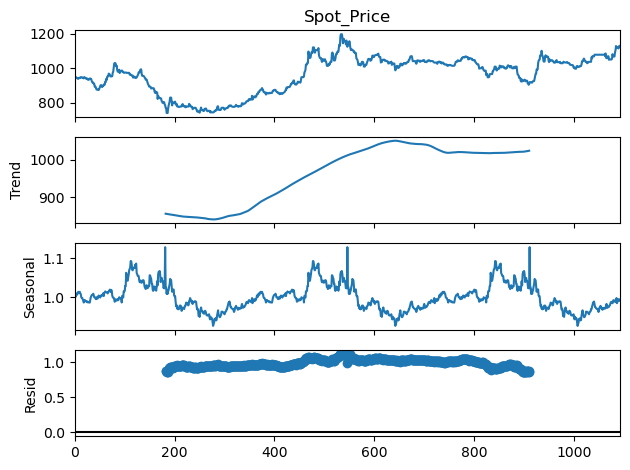

In [14]:
# Decompose time series to observe seasonality, trend, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Spot_Price'], model='multiplicative', period=365)
result.plot()
plt.show()


In [15]:
# Calculate VaR for spot prices
confidence_level = 0.95
var_spot = data['Spot_Returns'].quantile(1 - confidence_level)
print(f"Value at Risk (VaR) at {confidence_level*100}% confidence level: {var_spot}")

# Calculate VaR for futures prices
var_futures = data['Futures_Returns'].quantile(1 - confidence_level)
print(f"Value at Risk (VaR) at {confidence_level*100}% confidence level: {var_futures}")


Value at Risk (VaR) at 95.0% confidence level: -0.01355769903208336
Value at Risk (VaR) at 95.0% confidence level: -0.02269430896551285


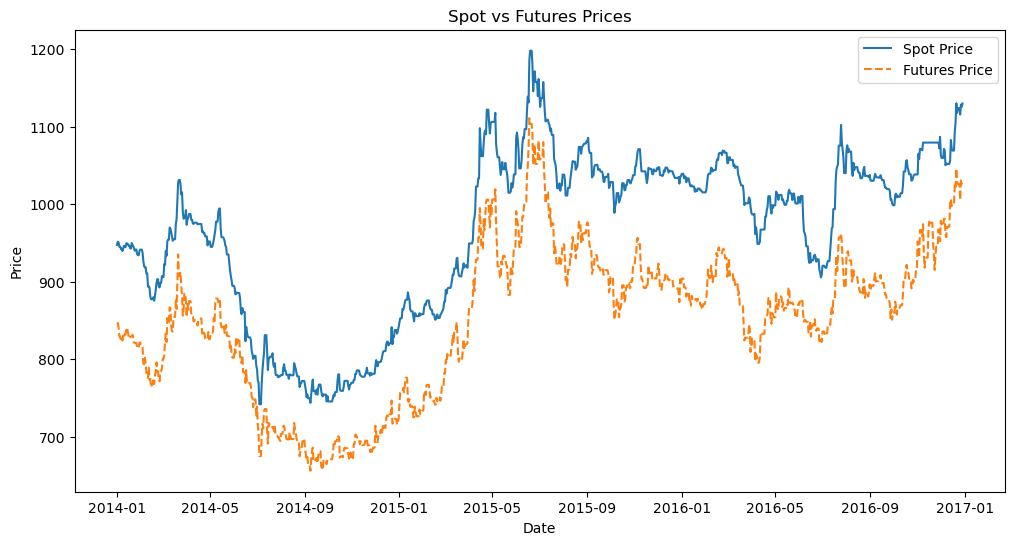

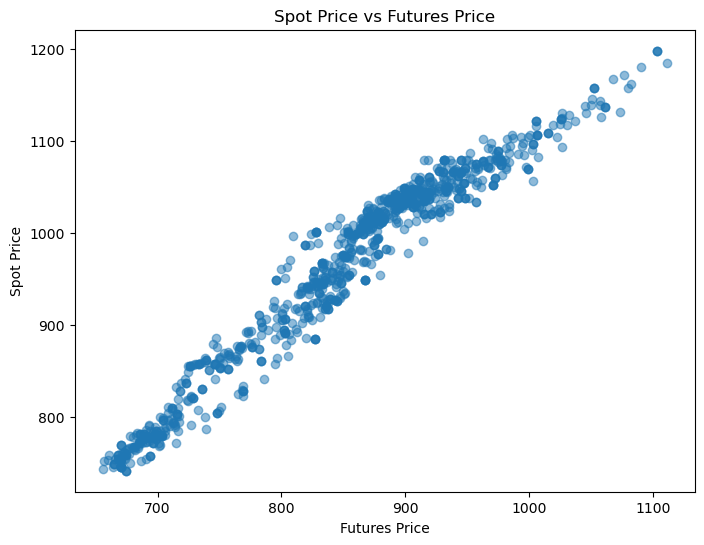

In [16]:
# Time series plot of spot and futures prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Spot_Price'], label='Spot Price')
plt.plot(data['Date'], data['Futures_Price'], label='Futures Price', linestyle='--')
plt.legend()
plt.title('Spot vs Futures Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Scatter plot for relationship between spot and futures prices
plt.figure(figsize=(8, 6))
plt.scatter(data['Futures_Price'], data['Spot_Price'], alpha=0.5)
plt.title('Spot Price vs Futures Price')
plt.xlabel('Futures Price')
plt.ylabel('Spot Price')
plt.show()


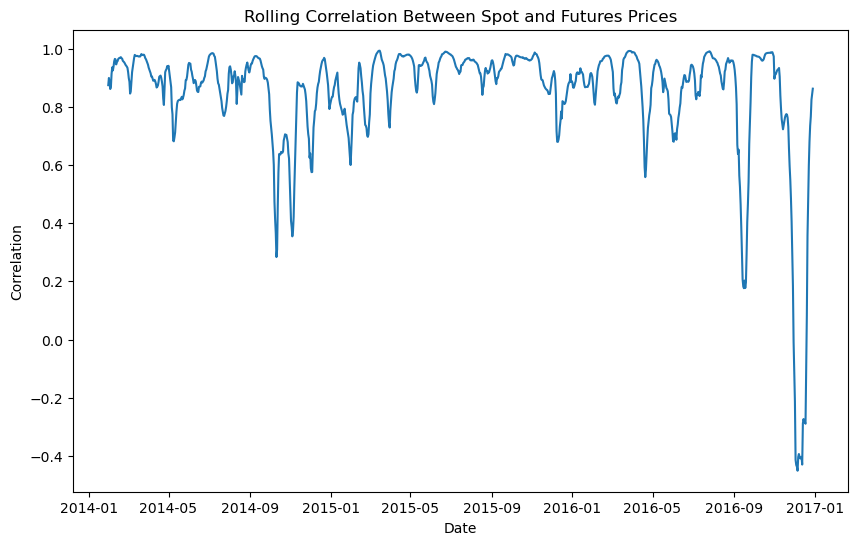

In [17]:
# Rolling correlation between spot and futures prices
data['Rolling_Correlation'] = data['Spot_Price'].rolling(window=30).corr(data['Futures_Price'])

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Rolling_Correlation'])
plt.title('Rolling Correlation Between Spot and Futures Prices')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.show()


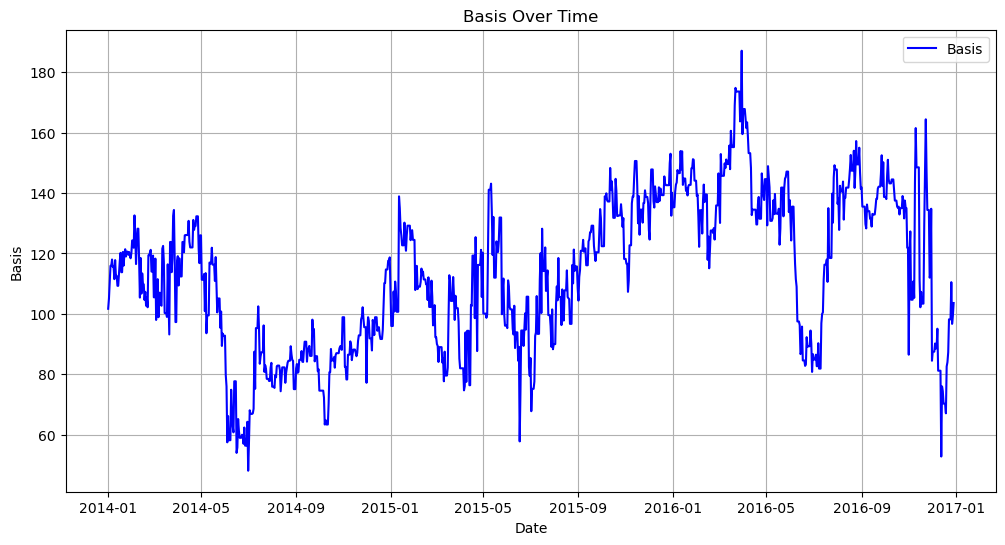

In [22]:
data['Basis'] = data['Spot_Price'] - data['Futures_Price']

# Plot the basis over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Basis'], label='Basis', color='blue')
plt.xlabel('Date')
plt.ylabel('Basis')
plt.title('Basis Over Time')
plt.legend()
plt.grid(True)
plt.savefig('Basis')
plt.show()

In [4]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\IITK 3rd\ECO764_2024\Week1_case_study\Mentha Oil Futures Historical Data (3).csv")

In [5]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31-12-2018,"1,534.40","1,518.00","1,548.80","1,508.00",0.20K,1.55%
1,28-12-2018,"1,511.00","1,544.90","1,544.90","1,496.60",0.16K,-1.58%
2,27-12-2018,"1,535.20","1,525.00","1,539.00","1,518.00",0.07K,2.29%
3,26-12-2018,"1,500.80","1,489.90","1,534.50","1,486.20",0.37K,1.71%
4,24-12-2018,"1,475.50","1,432.20","1,500.00","1,427.10",0.51K,-0.06%


In [6]:
import matplotlib.pyplot as plt

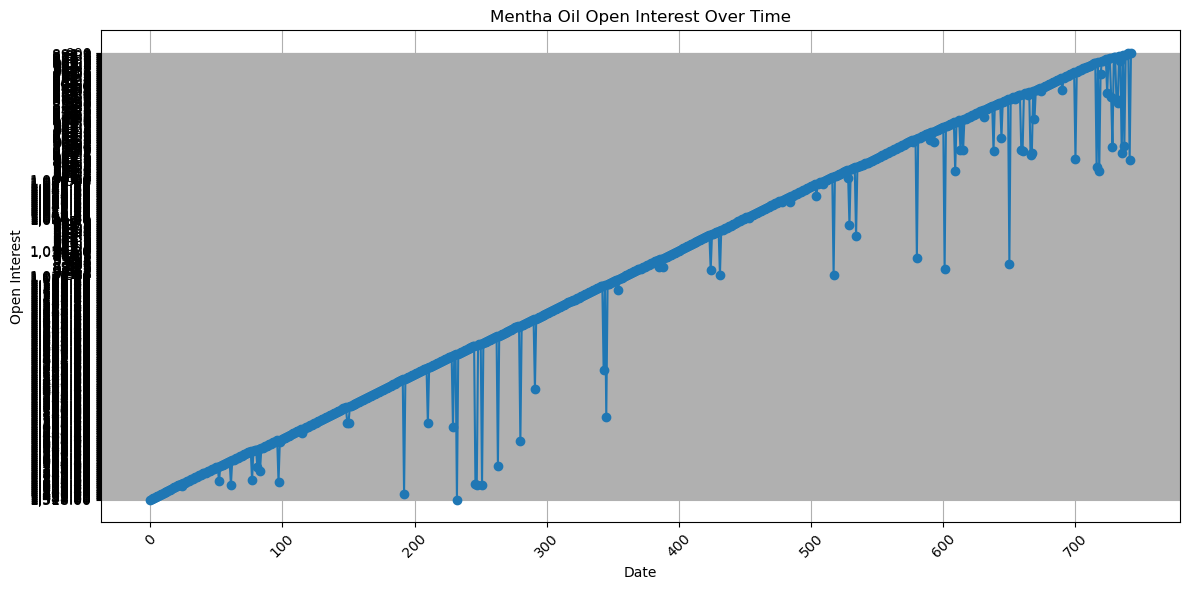

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Open'], marker='o', linestyle='-')

# Customize the plot
plt.title('Mentha Oil Open Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Open Interest')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
df = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\IITK 3rd\ECO764_2024\Week1_case_study\Mentha Oil Futures Historical Data (4).csv")

In [20]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,13-08-2024,965,967,971.9,964.0,0.09K,-0.40%
1,12-08-2024,968.9,975,984.5,968.9,0.22K,-1.08%
2,09-08-2024,979.5,991.8,994.7,975.1,0.26K,-0.49%
3,08-08-2024,984.3,994,994.8,978.1,0.34K,-0.93%
4,07-08-2024,993.5,"1,008.70","1,025.00",988.0,0.66K,-0.84%
5,06-08-2024,"1,001.90","1,000.00","1,007.00",996.4,0.19K,0.05%
6,05-08-2024,"1,001.40","1,011.60","1,021.80",999.0,0.43K,-0.64%
7,02-08-2024,"1,007.90",984.5,"1,014.00",984.5,0.55K,2.80%
8,01-08-2024,980.4,979.9,985.5,967.6,0.30K,3.03%
9,31-07-2024,951.6,940.1,955,940.1,0.01K,1.23%


In [22]:
df1 = df[['Date','Price','Vol.']]

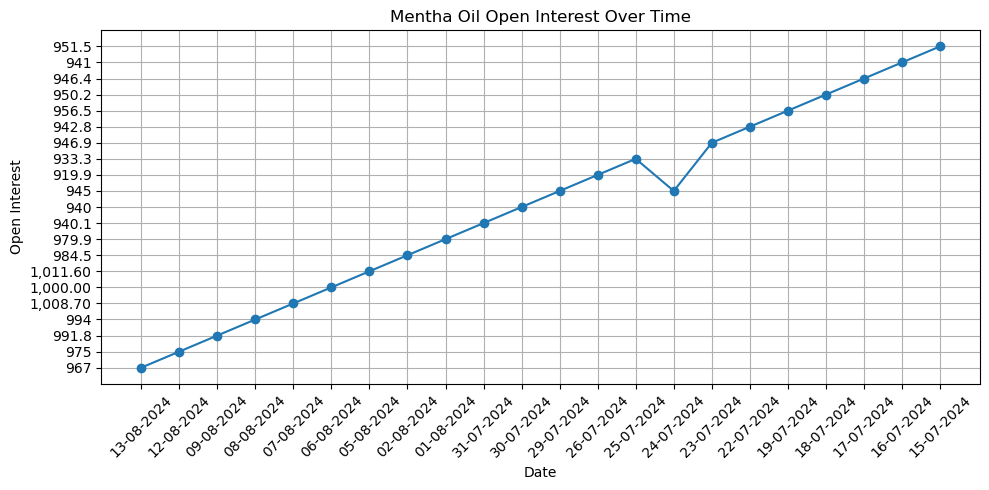

In [15]:
plt.figure(figsize=(10, 5))
plt.plot( df['Date'],df['Open'], marker='o', linestyle='-')

# Customize the plot
plt.title('Mentha Oil Open Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Open Interest')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.savefig("mentha oil open interest")
plt.show()

In [23]:
df1.head(10)

,Date,Price,Vol.
0,13-08-2024,965,0.09K
1,12-08-2024,968.9,0.22K
2,09-08-2024,979.5,0.26K
3,08-08-2024,984.3,0.34K
4,07-08-2024,993.5,0.66K
5,06-08-2024,"1,001.90",0.19K
6,05-08-2024,"1,001.40",0.43K
7,02-08-2024,"1,007.90",0.55K
8,01-08-2024,980.4,0.30K
9,31-07-2024,951.6,0.01K
